In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('./data/ch1_sport_test.csv',
                index_col='학생번호')
df

,학년,악력,윗몸일으키기,점수,순위
학생번호,,,,,
1,1,40.2,34,15,4
2,1,34.2,14,7,10
3,1,28.8,27,11,7
4,2,39.0,27,14,5
5,2,50.9,32,17,2
6,2,36.5,20,9,9
7,3,36.6,31,13,6
8,3,49.2,37,18,1
9,3,26.0,28,10,8


In [4]:
df['악력']

학생번호
1     40.2
2     34.2
3     28.8
4     39.0
5     50.9
6     36.5
7     36.6
8     49.2
9     26.0
10    47.4
Name: 악력, dtype: float64

In [5]:
df.shape

(10, 5)

In [6]:
import numpy as np
import pandas as pd

#Jupyter Notebook 출력을 소수점 이하 3자리로 제한
%precision 3
#DataFrame의 출력을 소수점 이하 3자리로 제한
pd.set_option('precision',3)

In [7]:
df = pd.read_csv('./data/ch2_scores_em.csv')
df.head()

,student number,english,mathematics
0,1,42,65
1,2,69,80
2,3,56,63
3,4,41,63
4,5,57,76


In [8]:
scores = np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [9]:
scores_df = pd.DataFrame({'score':scores},
                        index=pd.Index(['A','B','C','D','E',
                                       'F','G','H','I','J',],
                                      name='student'))

In [10]:
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [11]:
print(scores)
print(sum(scores))
print(len(scores))
sum(scores)/len(scores)

[42 69 56 41 57 48 65 49 65 58]
550
10


55.0

In [12]:
np.mean(scores)

55.0

In [13]:
scores_df.mean()

score    55.0
dtype: float64

In [14]:
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [15]:
n = len(sorted_scores)
if n % 2 == 0:
    m0 = sorted_scores[n//2-1]
    m1 = sorted_scores[n//2]
    median = (m0+m1)/2
else:
    median = sorted_scores[(n+1)//2-1]
median

56.5

In [16]:
np.median(scores)

56.5

In [17]:
scores_df.median()

score    56.5
dtype: float64

In [18]:
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

In [19]:
pd.Series([1,2,3,4,5]).mode()

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [20]:
mean = np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [21]:
another_scores = [50,60,58,54,51,56,57,53,52,59]
another_mean = np.mean(another_scores)
another_deviation = another_scores - another_mean
another_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [22]:
np.mean(deviation**2)

86.0

In [23]:
np.var(scores)

86.0

In [24]:
summary_df = scores_df.copy()
summary_df['deviation'] = deviation
summary_df['square of deviation'] = np.square(deviation)
summary_df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [25]:
summary_df.mean()

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

In [26]:
np.sqrt(np.var(scores, ddof=0))

9.273618495495704

In [27]:
print(np.std(scores))
print(np.std(scores,ddof=1))

9.273618495495704
9.775252199076787


In [28]:
np.max(scores)-np.min(scores)

28

In [29]:
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores,75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.0

In [30]:
pd.Series(scores).describe()

count    10.000
mean     55.000
std       9.775
min      41.000
25%      48.250
50%      56.500
75%      63.250
max      69.000
dtype: float64

In [31]:
z = (scores-np.mean(scores)) / np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [32]:
np.mean(z), np.std(z, ddof=0)

(-1.6653345369377347e-17, 0.9999999999999999)

In [33]:
z = 50+10*(scores - np.mean(scores)) / np.std(scores)
z

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [34]:
scores_df['deviation value'] = z
scores_df

,score,deviation value
student,,
A,42,35.982
B,69,65.097
C,56,51.078
D,41,34.903
E,57,52.157
F,48,42.452
G,65,60.783
H,49,43.530
I,65,60.783


In [35]:
english_scores = np.array(df['english'])
pd.Series(english_scores).describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

In [36]:
freq, _ = np.histogram(english_scores, bins=10, range=(0,100))
print(freq)

[ 0  0  0  2  8 16 18  6  0  0]


In [37]:
freq_class = [f'{i}~{i+10}' for i in range(0,100,10)]

freq_dist_df = pd.DataFrame({'frequency': freq},
                           index=pd.Index(freq_class, name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [38]:
class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [39]:
rel_freq = freq/freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [40]:
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [41]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class value', 'frequency',
                            'relative frequency',
                            'cumulative relative frequency']]
freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


In [42]:
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']

65

In [43]:
import matplotlib.pyplot as plt

#그래프가 jupyter notebook 위에 표시
%matplotlib inline

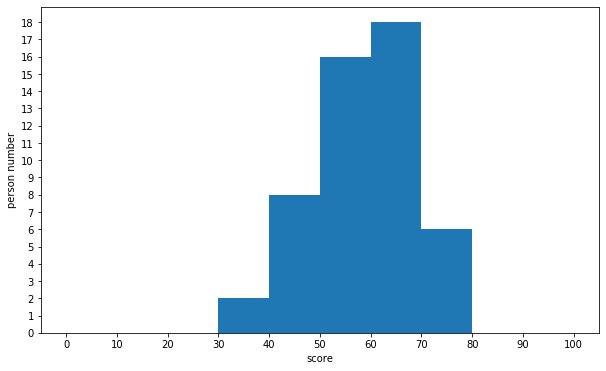

In [44]:
#캔버스 생성
#figsize로 가로,세로 크기 지정
fig = plt.figure(figsize=(10,6))
#캔버스 위에 그래프를 그리기 위한 영역을 지정
#인수는 영역을 1X1개 지정, 하나의 영역에 그린다는 것을 의미
ax = fig.add_subplot(111)

#계급수를 10으로 하여 히스토그램을 그림
freq, _, _ = ax.hist(english_scores, bins=10, range=(0,100))
#X축에 레이블 부여
ax.set_xlabel('score')
#Y축에 레이블 부여
ax.set_ylabel('person number')
#X축을 0,10,20 ..., 100 눈금으로 구분
ax.set_xticks(np.linspace(0,100,10+1))
#Y축을 0,1,2...의 눈금으로 구분
ax.set_yticks(np.arange(0,freq.max()+1))
plt.show()

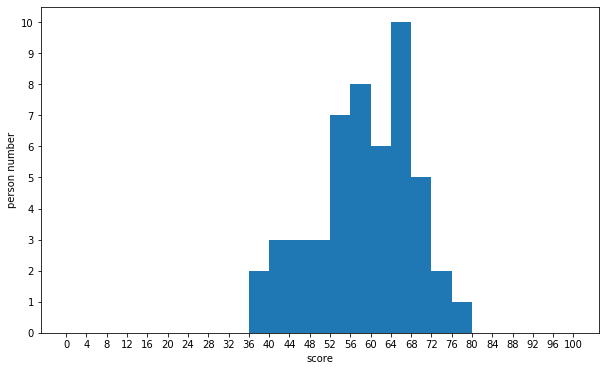

In [45]:
fig = plt.figure(figsize=(10,6))
ax =fig.add_subplot(111)

freq,_,_ = ax.hist(english_scores, bins=25, range=(0,100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0,100,25+1))
ax.set_yticks(np.arange(freq.max()+1))
plt.show()

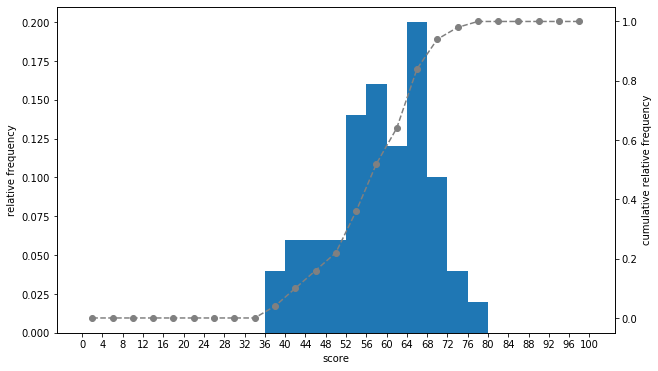

In [46]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)

#Y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()

#상대도수의 히스토그램으로 하기 위해서는, 도수를 데이터의 수로 나눌 필요가 있음
#이것은 hist의 인수 weight를 지정하면 실현 가능
weights = np.ones_like(english_scores)/len(english_scores)
rel_freq,_,_ = ax1.hist(english_scores, bins=25,
                       range=(0,100), weights=weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0,100,4)]

#꺾은선 그래프를 그림
#인수 ls를 '--'로 하면 점선이 그려짐
#인수 marker를 'o'로 하면 데이터 점을 그림
#인수 color를 'gray'로 하면 회색으로 지정
ax2.plot(class_value, cum_rel_freq,
        ls='--', marker='o', color='gray')
#꺾은선 그래프의 눈금선을 제거
ax2.grid(visible=False)

ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax2.set_ylabel('cumulative relative frequency')
ax1.set_xticks(np.linspace(0,100,25+1))

plt.show()

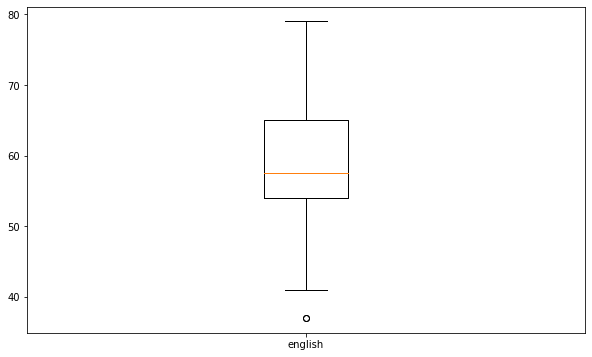

In [47]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.boxplot(english_scores, labels=['english'])
plt.show()

In [48]:
import numpy as np
import pandas as pd

%precision 3
pd.set_option('precision',3)

In [49]:
df = pd.read_csv('./data/ch2_scores_em.csv',
                index_col = 'student number')

In [52]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english': en_scores,
                         'mathematics': ma_scores},
                        index=pd.Index(['A','B','C','D','E',
                                       'F','G','H','I','J'],
                                      name='student'))
scores_df

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [54]:
summary_df = scores_df.copy()
summary_df['english_deviation'] = \
    summary_df['english'] - summary_df['english'].mean()
summary_df['mathematics_deviation'] = \
    summary_df['mathematics'] - summary_df['mathematics'].mean()

summary_df['product of deviations'] = \
    summary_df['english_deviation'] * summary_df['mathematics_deviation']
summary_df


,english,mathematics,english_deviation,mathematics_deviation,product of deviations
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [55]:
summary_df['product of deviations'].mean()

62.800

In [62]:
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat
cov_mat[0,0], cov_mat[1,1], cov_mat[1,0]

(86.0, 68.44000000000001, 62.800000000000004)

In [63]:
np.var(en_scores, ddof=0), np.var(ma_scores, ddof=0)

(86.0, 68.44000000000001)

In [65]:
np.cov(en_scores, ma_scores, ddof=0)[1,0]/(np.std(en_scores) * np.std(ma_scores))

0.8185692341186713

In [66]:
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [68]:
scores_df.corr()

,english,mathematics
english,1.000,0.819
mathematics,0.819,1.000


In [69]:
import matplotlib.pyplot as plt
%matplotlib inline

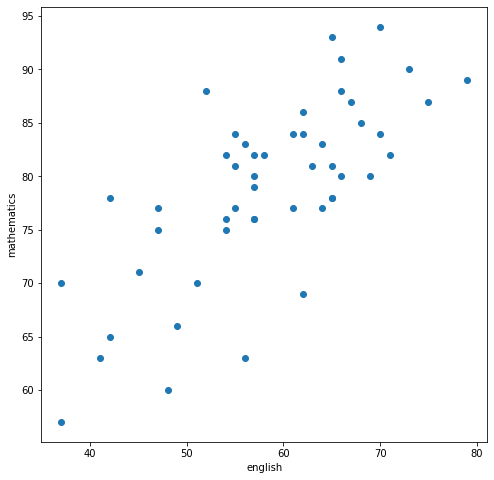

In [70]:
english_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)

#산점도
ax.scatter(english_scores, math_scores)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

plt.show()

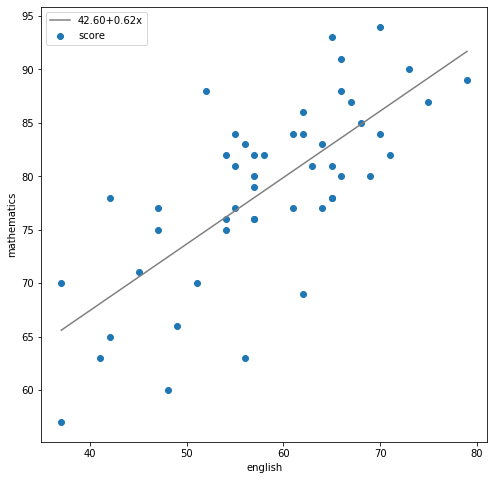

In [74]:
#계수 베타_0과 베타_1을 구한다
poly_fit = np.polyfit(english_scores, math_scores, 1)

poly_1d = np.poly1d(poly_fit)
xs = np.linspace(english_scores.min(), english_scores.max())

ys = poly_1d(xs)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.scatter(english_scores, math_scores, label='score')
ax.plot(xs, ys, color='gray',
       label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.set_xlabel('english')
ax.set_ylabel('mathematics')

ax.legend(loc='upper left')

plt.show()

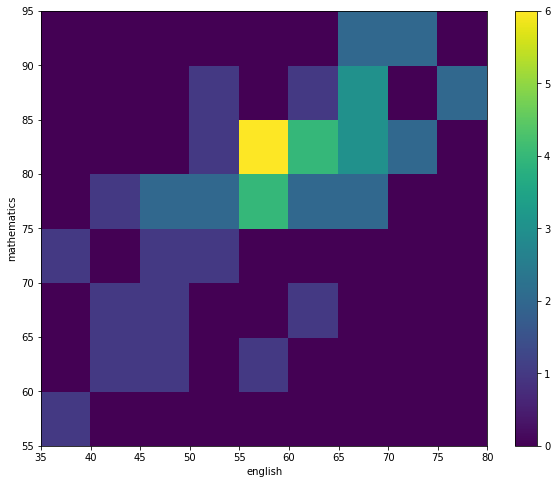

In [75]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores,
             bins=[9,8], range=[(35,80), (55,95)])
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])

fig.colorbar(c[3], ax=ax)
plt.show()

In [78]:
anscombe_data = np.load('./data/ch3_anscombe.npy')
print(anscombe_data.shape)
print(anscombe_data)

(4, 11, 2)
[[[10.    8.04]
  [ 8.    6.95]
  [13.    7.58]
  [ 9.    8.81]
  [11.    8.33]
  [14.    9.96]
  [ 6.    7.24]
  [ 4.    4.26]
  [12.   10.84]
  [ 7.    4.82]
  [ 5.    5.68]]

 [[10.    9.14]
  [ 8.    8.14]
  [13.    8.74]
  [ 9.    8.77]
  [11.    9.26]
  [14.    8.1 ]
  [ 6.    6.13]
  [ 4.    3.1 ]
  [12.    9.13]
  [ 7.    7.26]
  [ 5.    4.74]]

 [[10.    7.46]
  [ 8.    6.77]
  [13.   12.74]
  [ 9.    7.11]
  [11.    7.81]
  [14.    8.84]
  [ 6.    6.08]
  [ 4.    5.39]
  [12.    8.15]
  [ 7.    6.42]
  [ 5.    5.73]]

 [[ 8.    6.58]
  [ 8.    5.76]
  [ 8.    7.71]
  [ 8.    8.84]
  [ 8.    8.47]
  [ 8.    7.04]
  [ 8.    5.25]
  [19.   12.5 ]
  [ 8.    5.56]
  [ 8.    7.91]
  [ 8.    6.89]]]


In [79]:
stats_df = pd.DataFrame(index=['X_mean', 'X_variance', 'Y_mean',
                              'y_variance', 'X&Y_correlation',
                              'X&Y_regression line'])
for i, data in enumerate(anscombe_data):
    dataX = data[:,0]
    print(dataX)
    dataY = data[:,1]
    print(dataY)
    poly_fit = np.polyfit(dataX, dataY, 1)
    stats_df[f'data{i+1}']=\
        [f'{np.mean(dataX):.2f}',
         f'{np.var(dataX):.2f}',
         f'{np.mean(dataY):.2f}',
         f'{np.var(dataY):.2f}',
         f'{np.corrcoef(dataX, dataY)[0,1]:.2f}',
         f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x',
        ]
stats_df

[10.  8. 13.  9. 11. 14.  6.  4. 12.  7.  5.]
[ 8.04  6.95  7.58  8.81  8.33  9.96  7.24  4.26 10.84  4.82  5.68]
[10.  8. 13.  9. 11. 14.  6.  4. 12.  7.  5.]
[9.14 8.14 8.74 8.77 9.26 8.1  6.13 3.1  9.13 7.26 4.74]
[10.  8. 13.  9. 11. 14.  6.  4. 12.  7.  5.]
[ 7.46  6.77 12.74  7.11  7.81  8.84  6.08  5.39  8.15  6.42  5.73]
[ 8.  8.  8.  8.  8.  8.  8. 19.  8.  8.  8.]
[ 6.58  5.76  7.71  8.84  8.47  7.04  5.25 12.5   5.56  7.91  6.89]


,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


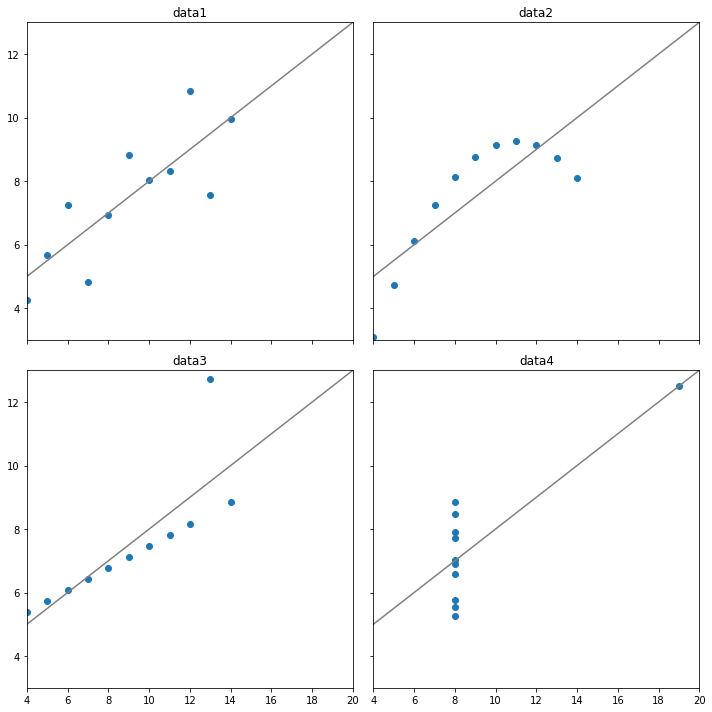

In [81]:
#그래프를 그리기 위한 영역을 2x2개 생성
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10),
                       sharex=True, sharey=True)

xs = np.linspace(0,30,100)
for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0], data[:,1], 1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    
    #그리는 영역 선택
    ax = axes[i//2, i%2]
    ax.set_xlim([4,20])
    ax.set_ylim([3,13])
    
    #타이틀 부여
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0], data[:,1])
    ax.plot(xs,ys,color='gray')
    
#그래프 사이의 간격을 좁힌다
plt.tight_layout()
plt.show()